In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.3.1


In [2]:
import pathlib

data_dir = pathlib.Path("Images")
image_count = len(list(data_dir.glob('*.jpg')))
print(image_count)

393


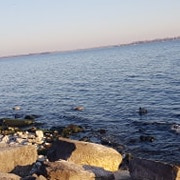

In [3]:
goose_data = list(data_dir.glob('*.jpg'))
PIL.Image.open(str(goose_data[4]))

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [41]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r"C:\Users\Danish Butt\Downloads\drive-download-20201123T215108Z-001",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 151 files belonging to 2 classes.
Using 121 files for training.


In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r"C:\Users\Danish Butt\Downloads\drive-download-20201123T215108Z-001",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 151 files belonging to 2 classes.
Using 30 files for validation.


In [43]:
class_names = train_ds.class_names
print(class_names)

['Goose', 'non-goose']


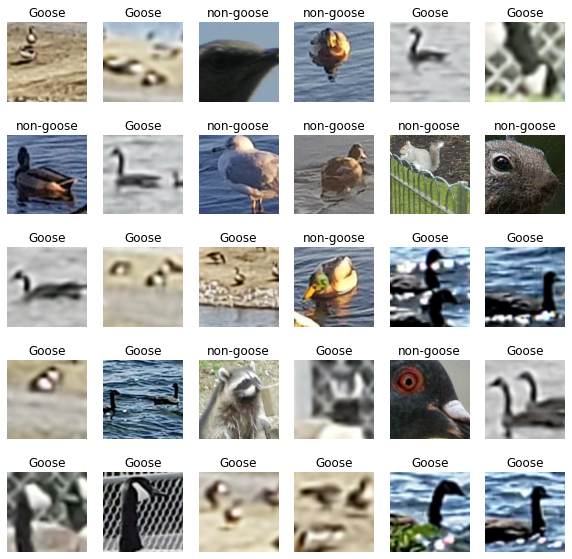

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(30):
    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [35]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [37]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [38]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [46]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
4/4 [==============================] - 5s 1s/step - loss: 0.5931 - accuracy: 0.6777 - val_loss: 0.6911 - val_accuracy: 0.5333
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.5614 - accuracy: 0.6777 - val_loss: 0.6930 - val_accuracy: 0.5333
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 0.5112 - accuracy: 0.7025 - val_loss: 0.6159 - val_accuracy: 0.5667
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.4856 - accuracy: 0.7438 - val_loss: 0.5614 - val_accuracy: 0.6667
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.4274 - accuracy: 0.8182 - val_loss: 0.6731 - val_accuracy: 0.5667
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 0.3710 - accuracy: 0.8512 - val_loss: 0.5353 - val_accuracy: 0.7000
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.2943 - accuracy: 0.8760 - val_loss: 0.3922 - val_accuracy: 0.8667
Epoch 8/10
4/4 [=========================